# SUPERSTORE DATA 

Import all needed liabraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_excel("C:\DATASCIENCE\DATASET\superstore_data.xlsx")
print(df.head())



   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
1       2  CA-2013-152156 2013-11-09 2013-11-12    Second Class    CG-12520   
2       3  CA-2013-138688 2013-06-13 2013-06-17    Second Class    DV-13045   
3       4  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   
4       5  US-2012-108966 2012-10-11 2012-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [15]:
print(df.info)

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2013-152156 2013-11-09 2013-11-12    Second Class   
1          2  CA-2013-152156 2013-11-09 2013-11-12    Second Class   
2          3  CA-2013-138688 2013-06-13 2013-06-17    Second Class   
3          4  US-2012-108966 2012-10-11 2012-10-18  Standard Class   
4          5  US-2012-108966 2012-10-11 2012-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2011-110422 2011-01-22 2011-01-24    Second Class   
9990    9991  CA-2014-121258 2014-02-27 2014-03-04  Standard Class   
9991    9992  CA-2014-121258 2014-02-27 2014-03-04  Standard Class   
9992    9993  CA-2014-121258 2014-02-27 2014-03-04  Standard Class   
9993    9994  CA-2014-119914 2014-05-05 2014-05-10    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

Data cleaning

to see if there is any nullcell in data

In [16]:
print(df.isna().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [17]:
df = df.rename(columns={'Row ID' : 'Row_ID','Order ID' :'Order_ID','Order Date' :'Order_Date','Ship Date' :'Ship_Date','Ship Mode':'Ship_mode','Customer ID':'Coustmer_ID','Customer Name':'Coustmer_Name','Postal Code':'Postal_code','Product ID':'Product_ID','Product Name':'Product_Name'  })

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_mode      9994 non-null   object        
 5   Coustmer_ID    9994 non-null   object        
 6   Coustmer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

checking if there us any duplicate values

In [19]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool


drop all duplicates using drop_duplicates()

ploting a box plot to find if there is any outlayers

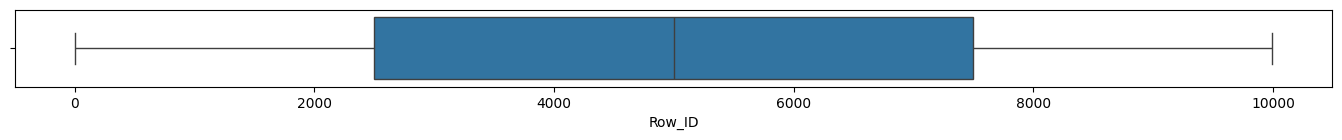

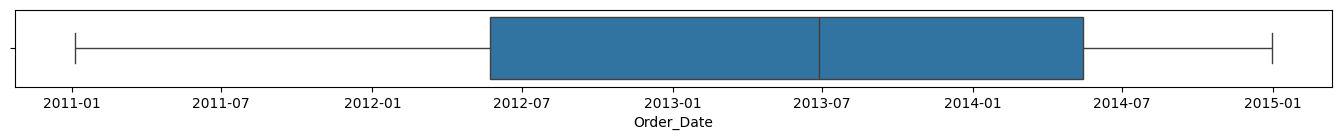

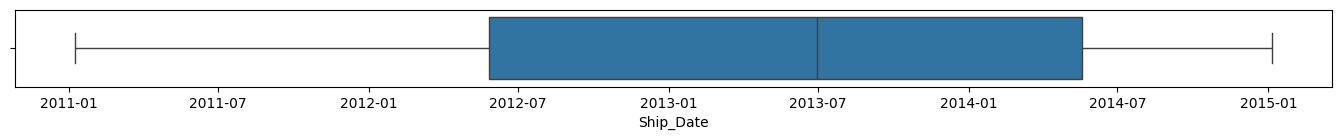

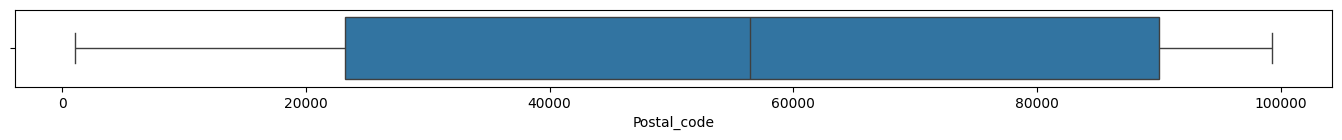

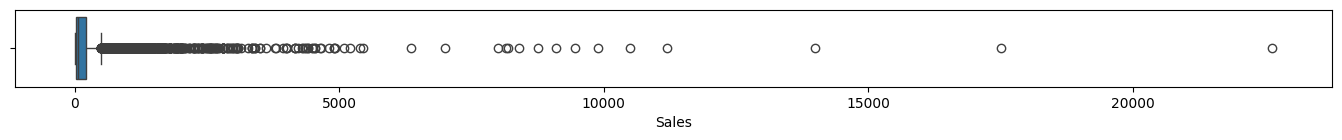

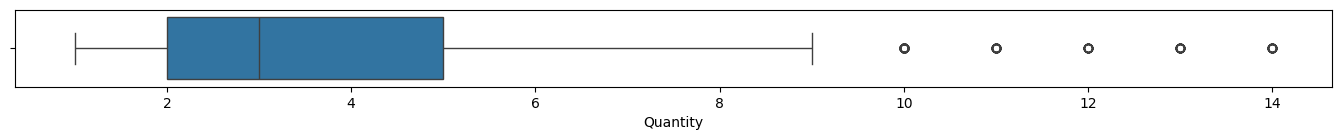

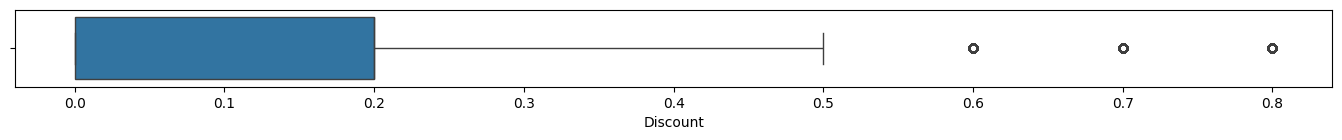

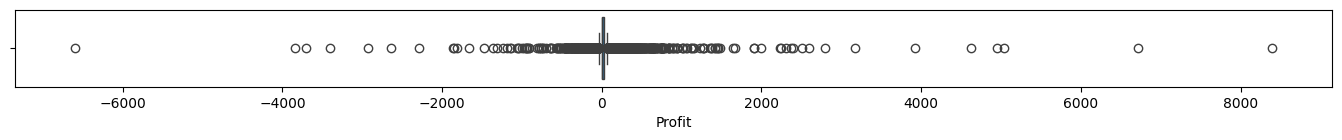

In [20]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df1,x=column)

In [32]:
df["z_score1"]=(df["Sales"]-df["Sales"].mean())/df["Sales"].std()
df["z_score2"]=(df["Quantity"]-df["Quantity"].mean())/df["Quantity"].std()
df["z_score3"]=(df["Discount"]-df["Discount"].mean())/df["Discount"].std()
threshold=1.5
df=df[df["z_score1"].abs()<=threshold]
df=df[df["z_score2"].abs()<=threshold]
df=df[df["z_score3"].abs()<=threshold]
df=df.drop(columns=["z_score1","z_score2","z_score3"])


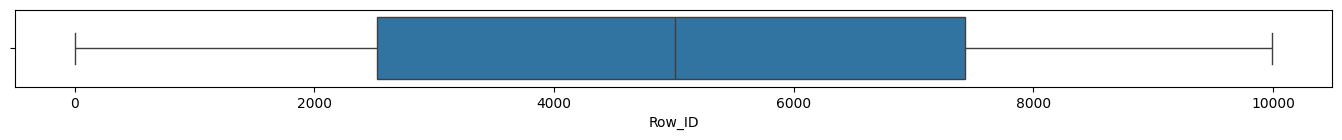

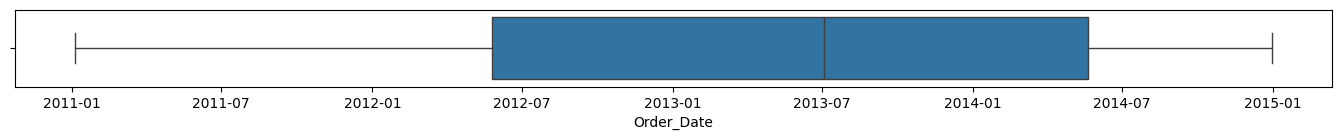

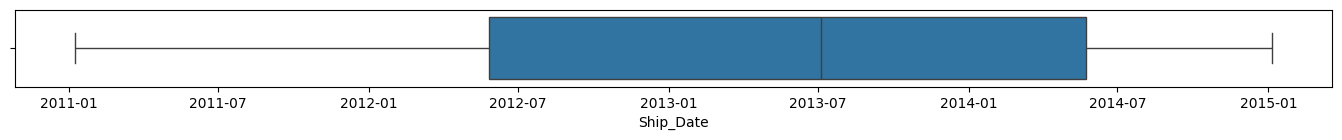

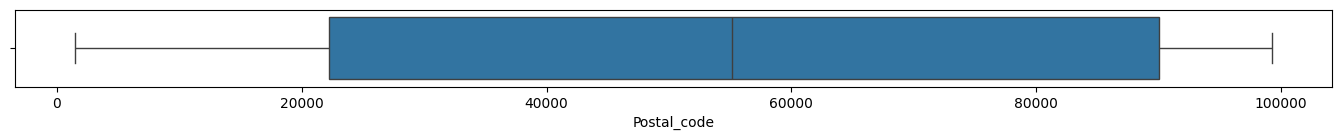

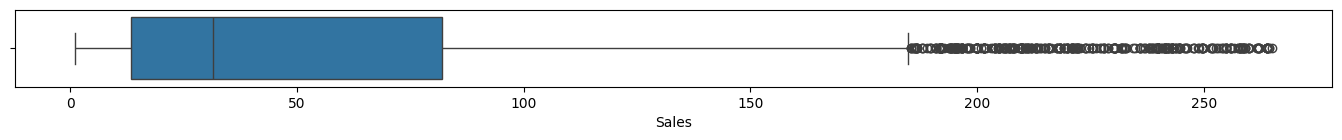

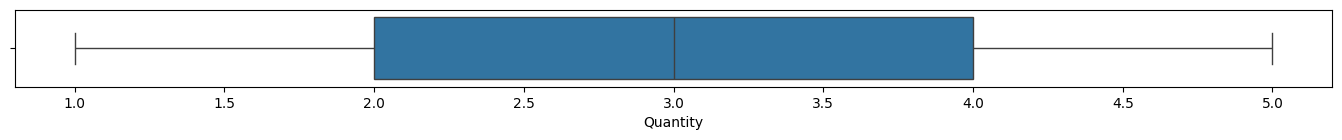

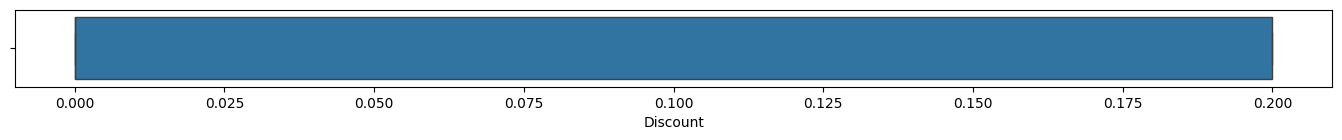

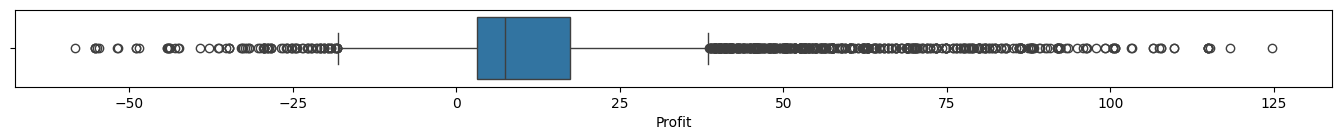

In [33]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=df1,x=column)

statistical analysis

find correlation this cor()method calculates the relationship between each column in your dataset

In [22]:
print(df.corr (numeric_only=True))

               Row_ID  Postal_code     Sales  Quantity  Discount    Profit
Row_ID       1.000000     0.010645 -0.013203 -0.006527  0.008783 -0.001081
Postal_code  0.010645     1.000000  0.005234  0.013922  0.008869 -0.008715
Sales       -0.013203     0.005234  1.000000  0.252650  0.002951  0.341294
Quantity    -0.006527     0.013922  0.252650  1.000000  0.008874  0.082104
Discount     0.008783     0.008869  0.002951  0.008874  1.000000 -0.356761
Profit      -0.001081    -0.008715  0.341294  0.082104 -0.356761  1.000000


In [23]:
print(df.cov(numeric_only=True))

                   Row_ID   Postal_code         Sales    Quantity   Discount  \
Row_ID       8.290504e+06  9.915901e+05 -11472.674974  -37.801772   4.445218   
Postal_code  9.915901e+05  1.046593e+09  51100.688191  905.907732  50.431496   
Sales       -1.147267e+04  5.110069e+04  91075.618818  153.364163   0.156556   
Quantity    -3.780177e+01  9.059077e+02    153.364163    4.045822   0.003137   
Discount     4.445218e+00  5.043150e+01      0.156556    0.003137   0.030895   
Profit      -3.034228e+02 -2.748617e+04  10040.780138   16.099316  -6.113118   

                   Profit  
Row_ID        -303.422799  
Postal_code -27486.174502  
Sales        10040.780138  
Quantity        16.099316  
Discount        -6.113118  
Profit        9503.344677  


In [24]:
df.describe()

,Row_ID,Order_Date,Ship_Date,Postal_code,Sales,Quantity,Discount,Profit
count,9464.000000,9464,9464,9464.000000,9464.000000,9464.000000,9464.000000,9464.000000
mean,4985.878064,2013-05-02 01:16:22.924767488,2013-05-06 00:09:26.018597120,54752.853762,181.923501,3.656699,0.136673,22.085907
min,1.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.852000,1.000000,0.000000,-2639.991200
25%,2484.750000,2012-05-28 00:00:00,2012-05-31 00:00:00,22204.000000,17.920000,2.000000,0.000000,2.222850
50%,4990.500000,2013-06-29 00:00:00,2013-07-02 00:00:00,53209.000000,54.900000,3.000000,0.100000,8.874400
75%,7466.250000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,203.920000,5.000000,0.200000,28.786800
max,9994.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,2079.400000,10.000000,0.700000,899.982000
std,2879.323510,NaN,NaN,32351.090151,301.787374,2.011423,0.175771,97.485100


questions and answers

1.Sales and profit by region

               Sales      Profit
Region                          
Central  374445.9592  41836.7180
East     491242.8220  50856.9569
South    279154.9950  35425.2729
West     576880.2385  80902.0796


<Axes: xlabel='Region'>

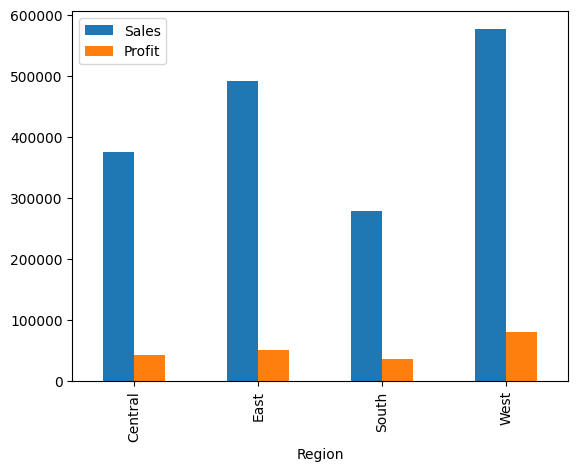

In [25]:
# Sales and profit by region
sales_profit_region = df.groupby('Region')[['Sales', 'Profit']].sum()
print(sales_profit_region)

sales_profit_region.plot(kind='bar')



In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5809 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         5809 non-null   int64         
 1   Order_ID       5809 non-null   object        
 2   Order_Date     5809 non-null   datetime64[ns]
 3   Ship_Date      5809 non-null   datetime64[ns]
 4   Ship_mode      5809 non-null   object        
 5   Coustmer_ID    5809 non-null   object        
 6   Coustmer_Name  5809 non-null   object        
 7   Segment        5809 non-null   object        
 8   Country        5809 non-null   object        
 9   City           5809 non-null   object        
 10  State          5809 non-null   object        
 11  Postal_code    5809 non-null   int64         
 12  Region         5809 non-null   object        
 13  Product_ID     5809 non-null   object        
 14  Category       5809 non-null   object        
 15  Sub-Category   5809 non-nu

2. What is the most commonly used shipping mode?

In [36]:
# Count of orders by shipping mode
ship_mode_counts = df['Ship_mode'].value_counts()
print(ship_mode_counts)


Ship_mode
Standard Class    3411
Second Class      1149
First Class        919
Same Day           330
Name: count, dtype: int64


3. Which category and sub-category are the most profitable?

In [ ]:
# Profit by category and sub-category
profit_category = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().sort_values(ascending=False)
print(profit_category)


Category         Sub-Category
Technology       Copiers         55617.8249
                 Phones          44515.7306
                 Accessories     41936.6357
Office Supplies  Paper           34053.5693
                 Binders         30221.7633
Furniture        Chairs          26590.1663
Office Supplies  Storage         21278.8264
                 Appliances      18138.0054
Furniture        Furnishings     13059.1436
Office Supplies  Envelopes        6964.1767
                 Art              6527.7870
                 Labels           5546.2540
Technology       Machines         3384.7569
Office Supplies  Fasteners         949.5182
                 Supplies        -1189.0995
Furniture        Bookcases       -3472.5560
                 Tables         -17725.4811
Name: Profit, dtype: float64


4. What is the correlation between discount and profit?

In [ ]:
# Correlation between discount and profit
discount_profit_corr = df[['Discount', 'Profit']].corr()
print(discount_profit_corr)


          Discount    Profit
Discount  1.000000 -0.219487
Profit   -0.219487  1.000000


5. Which state contributes the most to sales and profit?

Top sales state: California, Top profit state: California


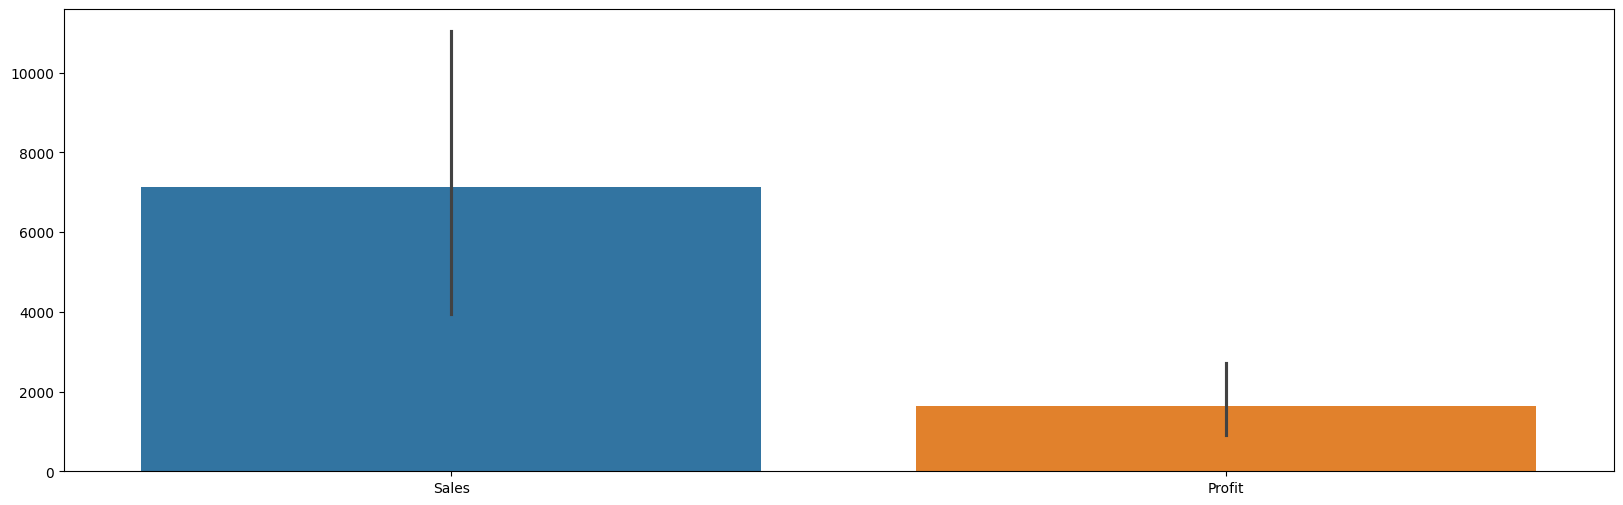

In [42]:
# State with highest sales and profit
state_sales_profit = df.groupby('State')[['Sales', 'Profit']].sum()
top_sales_state = state_sales_profit['Sales'].idxmax()
top_profit_state = state_sales_profit['Profit'].idxmax()
print(f"Top sales state: {top_sales_state}, Top profit state: {top_profit_state}")
plt.figure(figsize=(20,6))
sns.barplot(state_sales_profit)
plt.show()

6. What is the overall profit margin across the dataset?

In [ ]:
# Profit margin = Profit / Sales
df['Profit Margin'] = df['Profit'] / df['Sales']
overall_margin = df['Profit Margin'].mean()
print(f"Overall profit margin: {overall_margin:.2%}")


Overall profit margin: 12.03%


7. What is the sales and profit distribution across customer segments?

In [ ]:


# Sales and profit by customer segment
segment_sales_profit = df.groupby('Segment')[['Sales', 'Profit']].sum()
print(segment_sales_profit)

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


8. How are sales distributed across different product categories?

In [ ]:
# Sales by product category
category_sales = df.groupby('Category')['Sales'].sum()
print(category_sales)


Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64


9. What is the trend of sales and profit over time?

                  Sales      Profit
Year-Month                         
2011-01      13946.2290   2446.7711
2011-02       4810.5580    865.7280
2011-03      55691.0090    498.7299
2011-04      28295.3450   3488.8352
2011-05      23648.2870   2738.7096
2011-06      34595.1276   4976.5244
2011-07      33946.3930   -841.4826
2011-08      27909.4685   5318.1050
2011-09      81777.3508   8328.0994
2011-10      31453.3930   3448.2573
2011-11      78628.7167   9292.1269
2011-12      69545.6205   8983.5699
2012-01      18174.0756  -3281.0070
2012-02      12210.8670   2821.2762
2012-03      38466.7960   9724.6724
2012-04      34195.2085   4187.4962
2012-05      30131.6865   4667.8690
2012-06      24797.2920   3335.5572
2012-07      28765.3250   3288.6483
2012-08      36898.3322   5355.8084
2012-09      64595.9180   8209.1627
2012-10      31404.9235   2817.3660
2012-11      75972.5635  12474.7884
2012-12      74919.5212   8016.9659
2013-01      18542.4910   2824.8233
2013-02      22867.7110   49

<Axes: xlabel='Year-Month'>

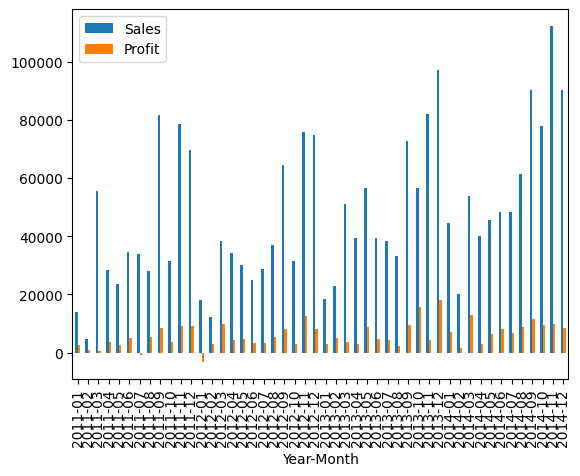

In [ ]:
# Convert Order Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Group by year-month for sales and profit trends
df['Year-Month'] = df['Order_Date'].dt.to_period('M')
sales_profit_trend = df.groupby('Year-Month')[['Sales', 'Profit']].sum()
print(sales_profit_trend)
sales_profit_trend.plot(kind='bar')


10. Are there any outliers in the sales and profit data?


In [ ]:
# Identify outliers using IQR
q1_sales = df['Sales'].quantile(0.25)
q3_sales = df['Sales'].quantile(0.75)
iqr_sales = q3_sales - q1_sales

q1_profit = df['Profit'].quantile(0.25)
q3_profit = df['Profit'].quantile(0.75)
iqr_profit = q3_profit - q1_profit

outliers_sales = df[(df['Sales'] < (q1_sales - 1.5 * iqr_sales)) | 
                            (df['Sales'] > (q3_sales + 1.5 * iqr_sales))]
outliers_profit = df[(df['Profit'] < (q1_profit - 1.5 * iqr_profit)) | 
                             (df['Profit'] > (q3_profit + 1.5 * iqr_profit))]

print(f"Sales outliers: {len(outliers_sales)}, Profit outliers: {len(outliers_profit)}")


Sales outliers: 1167, Profit outliers: 1881


Summary of the Dataset


Total Rows: 9,994
Total Columns: 21
Columns:
Identifiers: Row ID, Order ID, Customer ID, Product ID
Dates: Order Date, Ship Date
Shipping: Ship Mode
Customer Info: Customer Name, Segment, Country, City, State, Postal Code, Region
Product Info: Category, Sub-Category, Product Name
Transaction Details: Sales, Quantity, Discount, Profit
Data Types:
Numeric: Row ID, Postal Code, Sales, Quantity, Discount, Profit
Categorical: Most other fields
Dates: Order Date, Ship Date
The dataset appears to be a sales record with detailed information on orders, customers, products, and regions. It's well-structured and ready for analysis in areas like sales performance, customer segmentation, and shipping trends.